# College Admissions Predicator
Keyword: linear regression, machine learning

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

# Description

In this project, we will train regression models to find the probability of college admissions university. In this project we will go through the following tasks: 
(1) Understand the Problem Statement
(2) Import libraries and datasets 
(3) Perform Exploratory Data Analysis
(4) Perform Data Visualization
(5) Create Training and Testing Datasets
(6) Train and Evaluate a Linear Regression Model
(7) Train and Evaluate an Artificial Neural Network Model
(8) Train and Evaluate a Random Forest Regressor and Decision Tree Model

# Source
https://www.kaggle.com/sumithbhongale/american-university-data-ipeds-dataset

# Objective

Apply Python libraries to import and visualize dataset.

Perform exploratory data analysis

Understand the distribution and relationship of data

Split and Standardize training and testing dataset

Train various regression models using Scikit-Learn

# TASK #2: IMPORT LIBRARIES AND DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create Excel filepath
data = pd.read_csv("resources/Admission_Predict.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
#List all column names in dataset
for col in data.columns:
    print (col)

Serial No.
GRE Score
TOEFL Score
University Rating
SOP
LOR 
CGPA
Research
Chance of Admit 


In [4]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
#Statistical summary of the dataframe
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
print('Rows     :',data.shape[0])
print('Columns  :',data.shape[1])
print('\nFeatures :\n     :',data.columns.tolist())
print('\nMissing values    :',data.isnull().values.sum())
print('\nUnique values :  \n',data.nunique())

Rows     : 400
Columns  : 9

Features :
     : ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

Missing values    : 0

Unique values :  
 Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64


# TASKS #3 Perform Exploratory Data Analysis

In [7]:
data.columns.to_frame().T

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [8]:
data.count().to_frame().T

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,400,400,400,400,400,400,400,400,400


# Trimming The Data
Since we have so many attributes and not all are relevant we need to select the ones we want to use. We can do this by typing the following.

In [9]:
admissions = data.drop(columns = ['Serial No.', 'SOP', 'LOR ' ])

admissions =admissions.dropna()
admissions.head()

,GRE Score,TOEFL Score,University Rating,CGPA,Research,Chance of Admit
0,337,118,4,9.65,1,0.92
1,324,107,4,8.87,1,0.76
2,316,104,3,8.00,1,0.72
3,322,110,3,8.67,1,0.80
4,314,103,2,8.21,0,0.65


In [10]:
#List all column names in dataset
for col in admissions.columns:
    print (col)

GRE Score
TOEFL Score
University Rating
CGPA
Research
Chance of Admit 


In [11]:
admissions.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [12]:
admissions.rename(columns={'Serial No.':'Srno','GRE Score':'GRE','TOEFL Score':'TOEFL','University Rating':'UnivRating','Chance of Admit ':'Chance'},inplace=True)
admissions

,GRE,TOEFL,UnivRating,CGPA,Research,Chance
0,337,118,4,9.65,1,0.92
1,324,107,4,8.87,1,0.76
2,316,104,3,8.00,1,0.72
3,322,110,3,8.67,1,0.80
4,314,103,2,8.21,0,0.65
...,...,...,...,...,...,...
395,324,110,3,9.04,1,0.82
396,325,107,3,9.11,1,0.84
397,330,116,4,9.45,1,0.91
398,312,103,3,8.78,0,0.67


In [13]:
admissions.dtypes

GRE             int64
TOEFL           int64
UnivRating      int64
CGPA          float64
Research        int64
Chance        float64
dtype: object

# TASK #4: PERFORM DATA VISUALIZATION

In [14]:
# Produce a scatter matrix for several sample pairs of features in the data
sample_cols = ['GRE','TOEFL','UnivRating','CGPA','Research','Chance']
display(admissions[sample_cols].describe())

,GRE,TOEFL,UnivRating,CGPA,Research,Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,9.920000,1.000000,0.970000


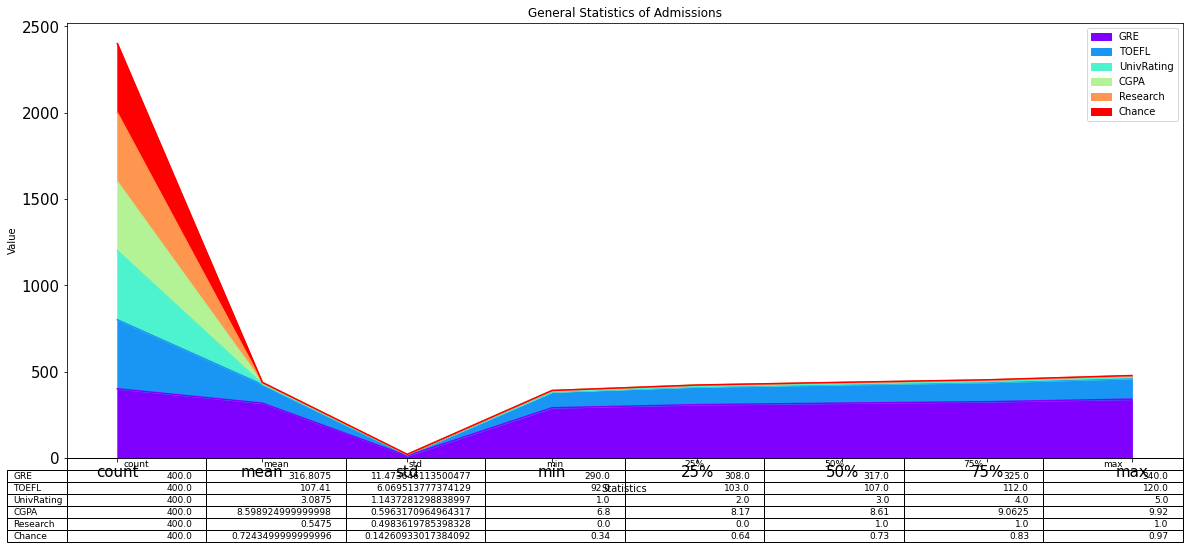

In [15]:
admissions.describe().plot(kind = "area",fontsize=15, figsize = (20,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Admissions")
plt.savefig('../code/static/images/general_admission.png')

plt.show()

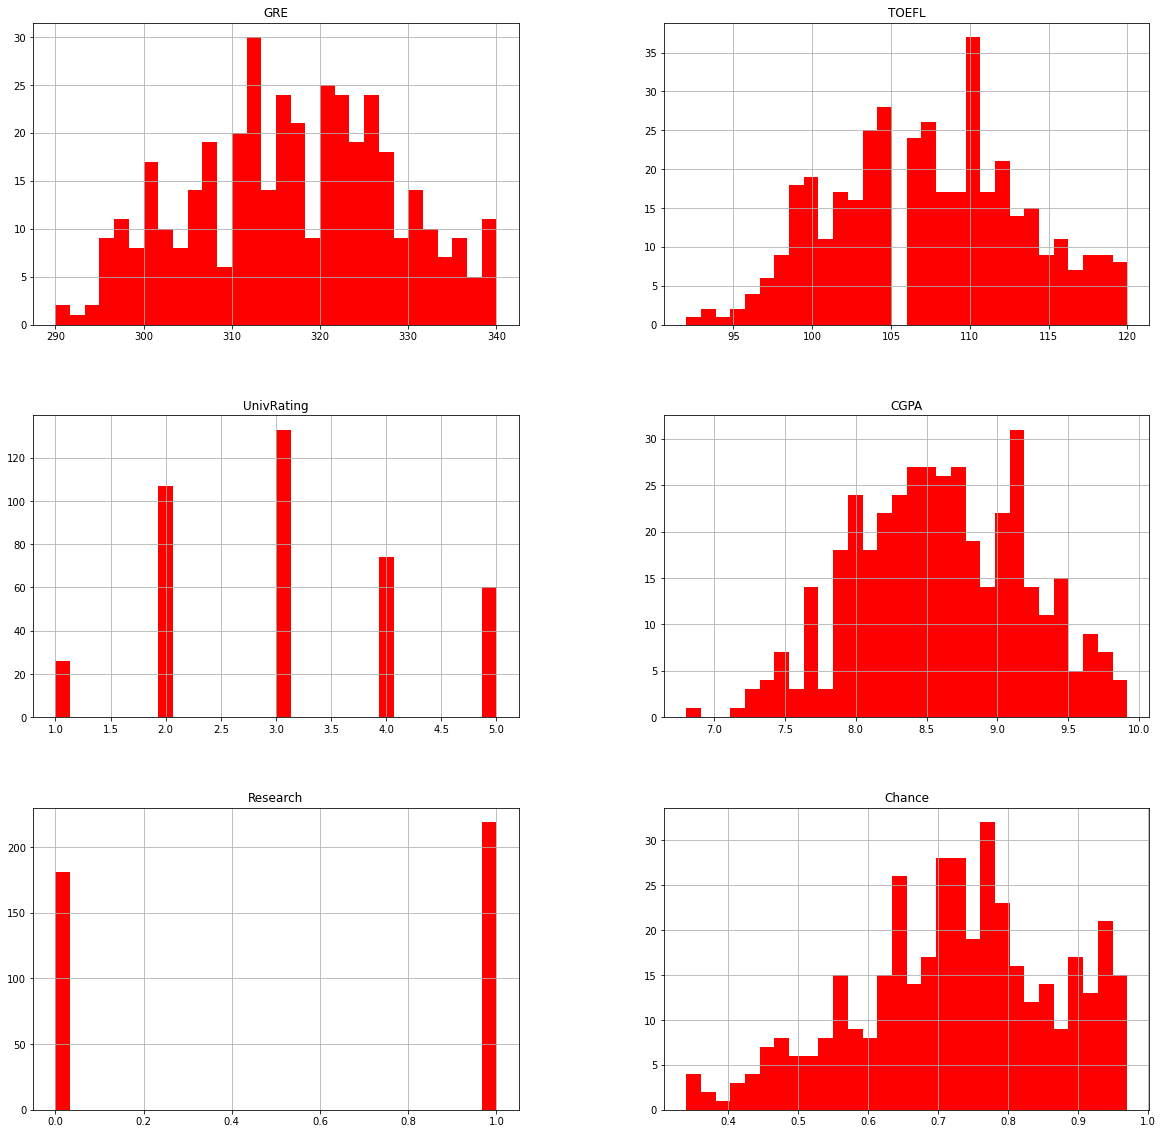

In [16]:
admissions.hist(bins = 30, figsize = (20, 20), color = 'r')
# Save the figure
# Show plot
plt.savefig('../code/static/images/admissions_hist.png')
plt.show()

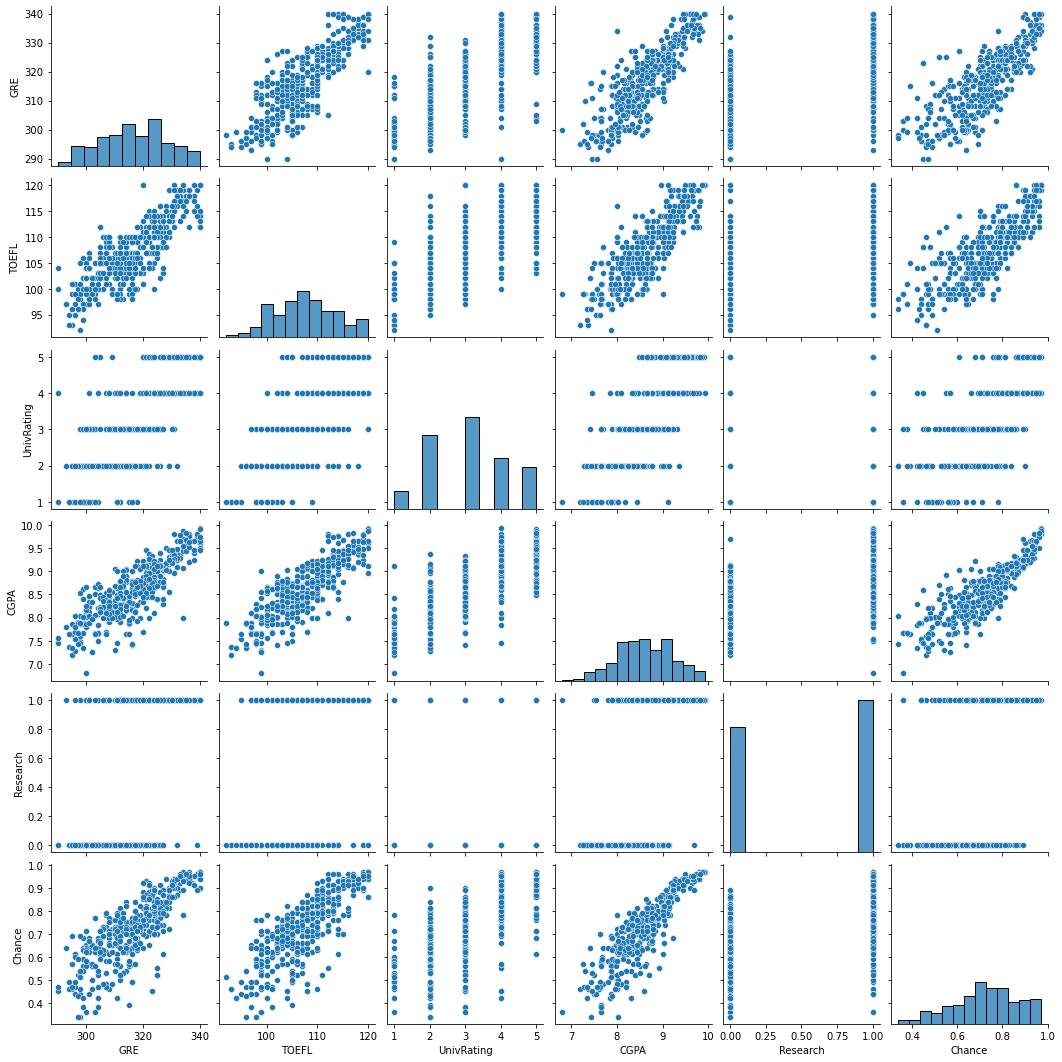

In [17]:
sns.pairplot(admissions)
# Save the figure
# Show plot
plt.savefig('../code/static/images/sns.pairplot.png')
plt.show()

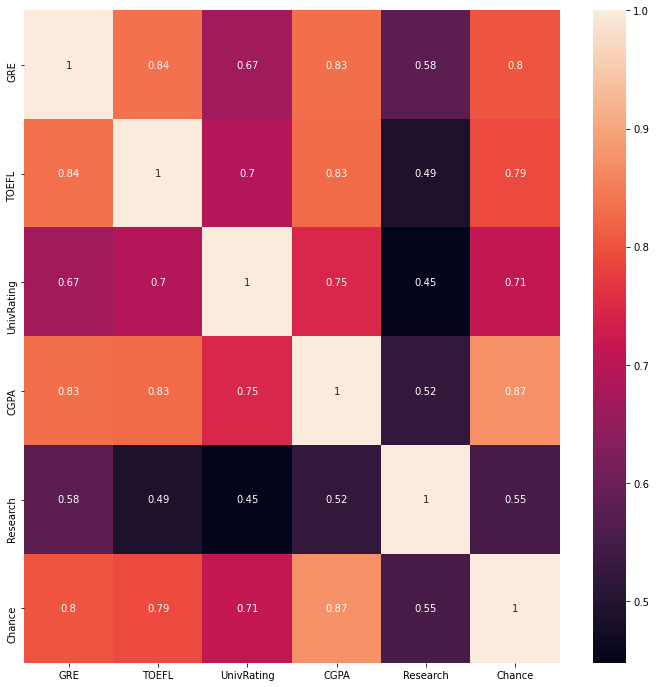

In [18]:
corr_matrix = admissions.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True)
# Save the figure
# Show plot
plt.savefig('../code/static/images/admissions_correlation_matrix.png')
plt.show()

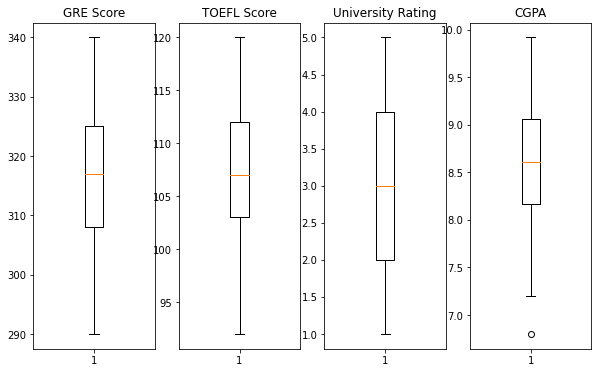

In [19]:
plt.figure(1, figsize=(10,6))
plt.subplot(1,4, 1)
plt.boxplot(admissions['GRE'])
plt.title('GRE Score')

plt.subplot(1,4,2)
plt.boxplot(admissions['TOEFL'])
plt.title('TOEFL Score')

plt.subplot(1,4,3)
plt.boxplot(admissions['UnivRating'])
plt.title('University Rating')

plt.subplot(1,4,4)
plt.boxplot(admissions['CGPA'])
plt.title('CGPA')

# Save the figure
# Show plot
plt.savefig('../code/static/images/box_whiskers.png')
plt.show()

Above box plot shows us the min,median and max values for GRE,TOEFL,University rating and CGPA for the dataset.

In [20]:
#correlations_data = admt.corr()['Chance'].sort_values(ascending=False)
cor=admissions.corr()['Chance']
# Print the correlations
cor

GRE           0.802610
TOEFL         0.791594
UnivRating    0.711250
CGPA          0.873289
Research      0.553202
Chance        1.000000
Name: Chance, dtype: float64

We can see that CGPA,GRE,TOEFL,University Ranking has the highest correlation with the chance of admission to the university.The other parameters like SOP,LOR and Research has less impact on the chance of admission.We can dropt he column Srno from our dataframe as it doesnt have any impact on the chance of admission.

In [21]:
print('Mean CGPA Score is :',int(admissions[admissions['CGPA']<=500].CGPA.mean()))
print('Mean GRE Score is :',int(admissions[admissions['GRE']<=500].GRE.mean()))
print('Mean TOEFL Score is :',int(admissions[admissions['TOEFL']<=500].TOEFL.mean()))
print('Mean University rating is :',int(admissions[admissions['UnivRating']<=500].UnivRating.mean()))

Mean CGPA Score is : 8
Mean GRE Score is : 316
Mean TOEFL Score is : 107
Mean University rating is : 3


Target of an aspirant would be get more than the mean scores displayed above.

How important is Research to get an Admission?

In [22]:
a=len(admissions[admissions.Research==1])
b=len(admissions[admissions.Research==0])
print('Total number of students',a+b)
print('Students having Research:',len(admissions[admissions.Research==1]))
print('Students not having Research:',len(admissions[admissions.Research==0]))

Total number of students 400
Students having Research: 219
Students not having Research: 181


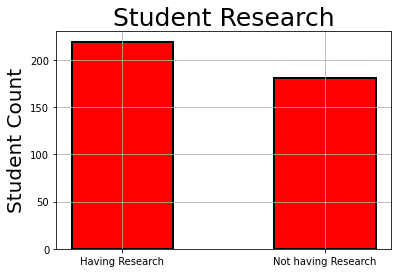

In [23]:
y=np.array([len(admissions[admissions.Research==1]),len(admissions[admissions.Research==0])])
x=['Having Research','Not having Research']
ax=plt.bar(x,y,width=0.5,color='red',edgecolor='k',align='center',linewidth=2)
#plt.xlabel('',fontsize=20)
plt.ylabel('Student Count',fontsize=20)
#ax.tick_params(labelsize=20)
plt.title('Student Research',fontsize=25)
plt.grid()
plt.ioff()
# Save the figure
# Show plot
plt.savefig('../code/static/images/student_research_bar.png')
plt.show()

C:\Users\monic\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


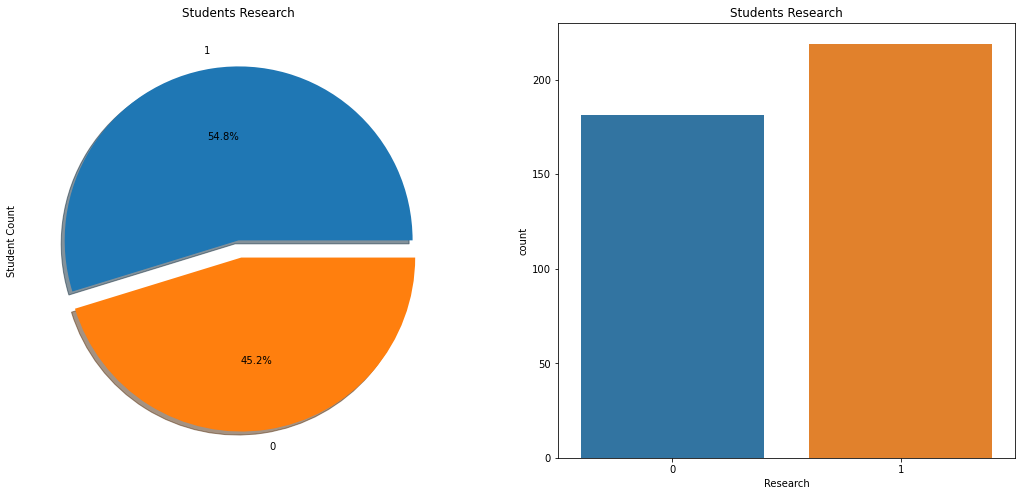

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))
admissions['Research'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Students Research')
ax[0].set_ylabel('Student Count')
sns.countplot('Research',data=admissions,ax=ax[1])
ax[1].set_title('Students Research')
# Save the figure
# Show plot
plt.savefig('../code/static/images/pie_chart_student_research.png')
plt.show()

# We can see that 55% Students have done Research.It possible only the better student could get a chance for doing research.Doing research does add practical knowledge and increases the student skill of working with groups or teams.

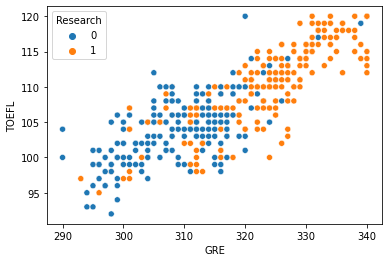

In [25]:
sns.scatterplot(data=admissions,x='GRE',y='TOEFL',hue='Research')
# Save the figure
# Show plot
plt.savefig('../code/static/images/gre_toefl_scatterplot.png')
plt.show()
plt.show()

We can see that stutents who have done research do have good TOEFL and GRE Score.

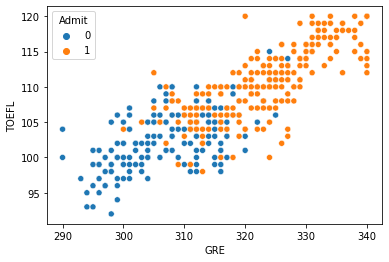

In [26]:
def modiffy(row):
    if row['Chance'] >0.7 :
        return 1
    else :
        return 0
admissions['Admit'] = admissions.apply(modiffy,axis=1)
admttemp = admissions.drop(['Chance'], axis=1)
#sns.pairplot(admttemp,hue='Admit')
sns.scatterplot(data=admttemp,x='GRE',y='TOEFL',hue='Admit')
del admttemp

We can clearly see that students with higher GRE and TOEFL scores have very high chance of getting an university admission.

C:\Users\monic\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\monic\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


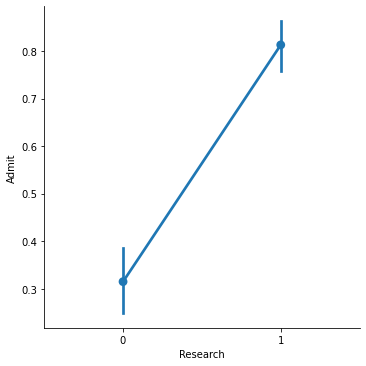

In [27]:
sns.factorplot('Research','Admit',data=admissions)
plt.show()

Chance of Admission increases if you do Research

# Task #5: Create Training and Testing Datasets

# Separating The Data
Now that the dataset has been trimmed,we need to separate it into 4 arrays. However, before we can do that we need to define what attribute we are trying to predict. This attribute is known as a label. The other attributes that will determine our label are known as features. Once we've done this we will use numpy to create two arrays. One that contains all of our features and one that contains our labels.

In [28]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [29]:
X=admissions.iloc[:,:-2].values
#X[0]
y=admissions.iloc[:,-2].values # or we can use y=data.iloc[:,3].values
#y[0]

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=0)

Linear Regression

# Task #6: Train and Evaluate a Linear Regression Model (Implementing the Algorithm)
Now that we understand how linear regression works we can use it to make predictions

We will start by defining the model which we will be using.

In [31]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [32]:
pred1=reg.predict(X_test)
print("Mean Squared Error: ",mean_squared_error(y_test,pred1))
#('Accuracy for Linear Regression is ',metrics.accuracy_score(y_pred,y_test))

Mean Squared Error:  0.005302181373016854


In [33]:
y_test

array([0.71, 0.7 , 0.79, 0.73, 0.72, 0.48, 0.77, 0.71, 0.9 , 0.94, 0.58,
       0.89, 0.72, 0.57, 0.78, 0.42, 0.64, 0.84, 0.63, 0.72])

In [34]:
pred1

array([0.707164  , 0.7119943 , 0.778136  , 0.62781826, 0.71908236,
       0.598814  , 0.71697688, 0.62366041, 0.87753016, 0.90409483,
       0.54453201, 0.88991498, 0.70387766, 0.45879379, 0.84356847,
       0.63901977, 0.62434787, 0.82440015, 0.57795673, 0.71367503])

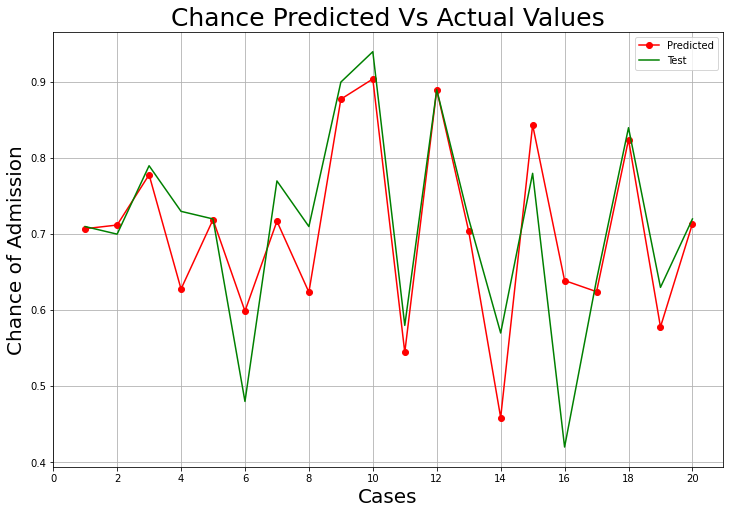

In [35]:
plt.figure(figsize=(12,8))
y=pred1
y1=y_test
x=np.arange(1, 21, 1)
x1=np.arange(0,21,2)
plt.plot(x,y,color='r',marker='o',label='Predicted')
plt.plot(x,y1,color='g',label='Actual')
plt.xticks(x1)
plt.gca().legend(('Predicted','Test'))
plt.xlabel('Cases',fontsize=20)
plt.ylabel('Chance of Admission',fontsize=20)
plt.title('Chance Predicted Vs Actual Values',fontsize=25)
plt.grid()
# Save the figure
# Show plot
plt.savefig('../code/static/images/chance_vs_actual.png')
plt.show()
plt.ioff()

We can see from the above plot that we have fairly good correlation.

Decision Tree

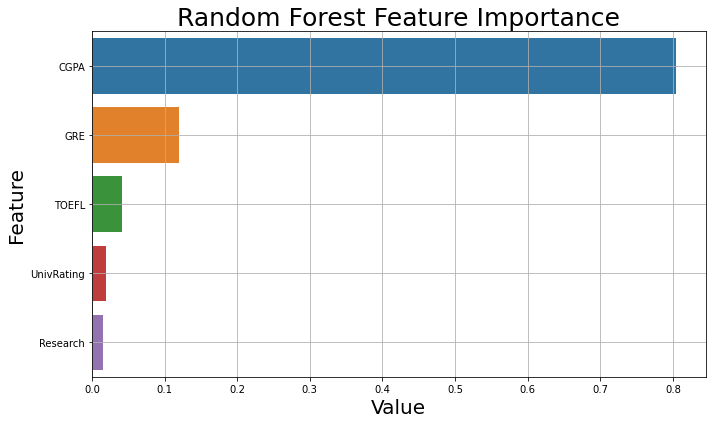

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 1000,random_state = 123)
columns = ['Admit']
admissions.drop(columns, inplace=True, axis=1)
X = admissions.drop('Chance',axis = 1)
y = admissions['Chance']
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = .25,random_state = 123)
rf_model = RandomForestRegressor(n_estimators = 1000,random_state = 123)
rf_model.fit(X_train,y_train)
feature_importance = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.xlabel('Value',fontsize=20)
plt.ylabel('Feature',fontsize=20)
plt.title('Random Forest Feature Importance',fontsize=25)
plt.grid()
plt.ioff()
plt.tight_layout()
# Save the figure
# Show plot
plt.savefig('../code/static/images/random_forest_feature_importance.png')
plt.show()

We can see CGPA,GRE, and TOEFL are most important features in the data set.

In [37]:
from joblib import dump, load
dump(reg, 'model.sav')

['model.sav']

In [38]:
model = load('model.sav')

In [39]:
import pickle
#
# Create your model here (same as above)
#
# Save to file in the current working directory
pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(reg, file)

In [40]:
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)